In [1]:
%matplotlib notebook
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid.axislines import SubplotZero
import numpy as np

/home/user/studium/masterarbeit/hep-monte-carlo/hepmc_env/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<IPython.core.display.Javascript object>


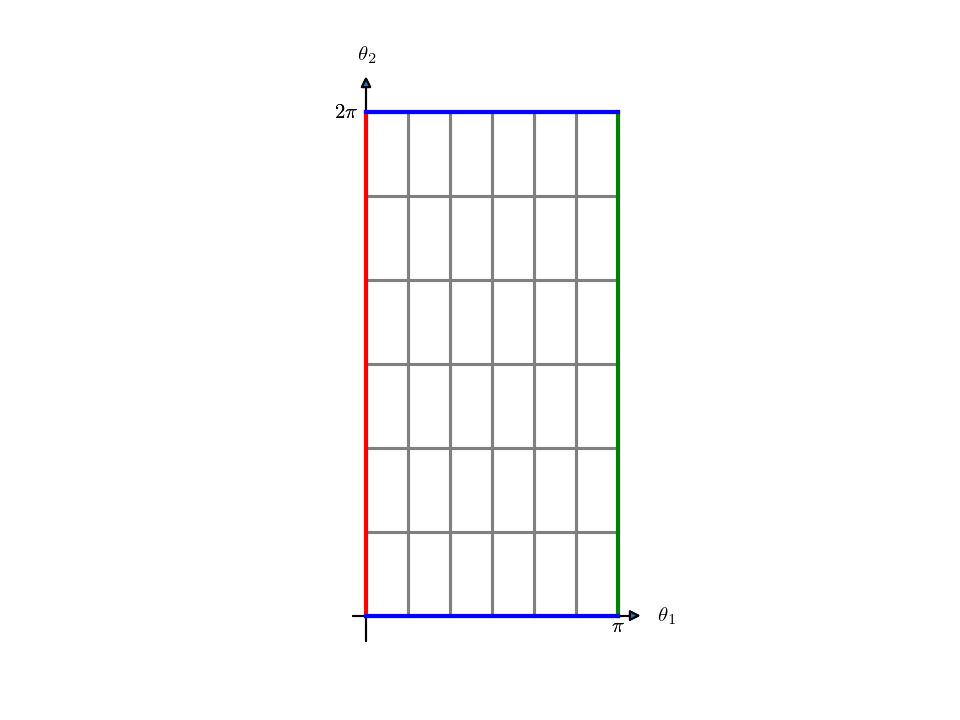

In [23]:
fig = plt.figure(1)
ax = SubplotZero(fig, 111)
fig.add_subplot(ax)
ax.set_aspect('equal')

for direction in ["xzero", "yzero"]:
    ax.axis[direction].set_axisline_style("-|>")
    ax.axis[direction].set_visible(True)

for direction in ["left", "right", "bottom", "top"]:
    ax.axis[direction].set_visible(False)

ax.set_xticks([np.pi])
ax.set_xticklabels([r"$\pi$"])
ax.set_yticks([2*np.pi])
ax.set_yticklabels([r"$2\pi$"])
ax.axis["yzero"].set_ticklabel_direction("-")
ax.axis["yzero"].major_ticklabels.set_axis_direction("left")

ax.text(np.pi+.5, -.1, r"$\theta_1$")
ax.text(-.1, 2*np.pi+.6, r"$\theta_2$")

n = 100

# longitudes
for y in np.linspace(0, 2*np.pi, 7):
    x = np.linspace(0, np.pi, n)
    y = np.full(n, y)

    ax.plot(x, y, color='grey', linestyle='-')
    
# latitudes
for x in np.linspace(0, np.pi, 7):
    x = np.full(n, x)
    y = np.linspace(0, 2*np.pi, n)
    

    ax.plot(x, y, color='grey', linestyle='-')

# left boundary
x = np.full(n, 0)
y = np.linspace(0, 2*np.pi, n)
ax.plot(x, y, 'r-', linewidth=2, zorder=3)

# right boundary
x = np.full(n, np.pi)
y = np.linspace(0, 2*np.pi, n)
ax.plot(x, y, 'g-', linewidth=2, zorder=3)

# top boundary
x = np.linspace(0, np.pi, n)
y = np.full(n, 2*np.pi)
ax.plot(x, y, 'b-', linewidth=2, zorder=3)

# bottom boundary
x = np.linspace(0, np.pi, n)
y = np.full(n, 0)
ax.plot(x, y, 'b-', linewidth=2, zorder=3)

plt.savefig('rectangle.pdf', bbox_inches='tight', dpi = 200)

In [3]:
def spherical(r, theta, phi):
    x = r*np.sin(theta)*np.cos(phi)
    y = r*np.sin(theta)*np.sin(phi)
    z = r*np.cos(theta)
    return x, y, z

<IPython.core.display.Javascript object>


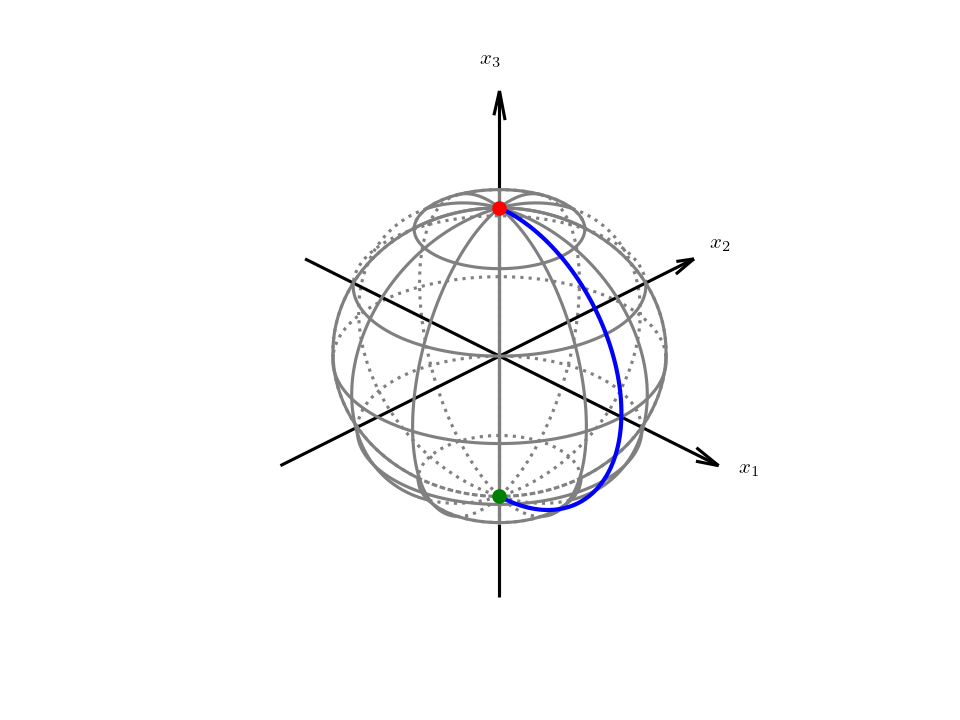

In [18]:
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.view_init(elev=30, azim=-45)
ax.set_aspect('equal')
ax.set_axis_off()

ax.set_xlim3d(-.9, .9)
ax.set_ylim3d(-.9, .9)
ax.set_zlim3d(-.9, .9)

n = 100

dtheta = 2*np.pi/360 * 30
dphi = 2*np.pi/360 * 45
r = 1

# axes
length = 3.5
start = -length/2
ax.quiver(start, 0, 0, length, 0, 0, arrow_length_ratio=.05, color='k')
ax.text(1.9, 0, 0, r"$x_1$")
ax.quiver(0, start, 0, 0, length, 0, arrow_length_ratio=.05, color='k')
ax.text(0, 1.9, 0, r"$x_2$")
ax.quiver(0, 0, start, 0, 0, length, arrow_length_ratio=.05, color='k')
ax.text(-.08, -.08, 1.9, r"$x_3$")

# longitudes
for phi in np.linspace(np.pi+dphi, 2*np.pi+dphi, 7):
    phi = np.full(n, phi)
    theta = np.linspace(-dtheta, np.pi-dtheta, n)

    ax.plot(*spherical(r, theta, phi), color='grey', linestyle='-')
    ax.plot(*spherical(r, theta+2*dtheta, 2*np.pi-phi+2*dphi), color='grey', linestyle=':', zorder=0)

# latitudes
for theta in np.linspace(-dtheta, np.pi-dtheta, 7):
    phi = np.linspace(np.pi+dphi, 2*np.pi+dphi, n)
    theta = np.full(n, theta)

    ax.plot(*spherical(r, theta, phi), color='grey', linestyle='-')
    ax.plot(*spherical(r, -theta-2*dtheta, phi), color='grey', linestyle=':', zorder=0)

# prime meridian
phi = np.full(n, 0)
theta = np.linspace(0, np.pi, n)
ax.plot(*spherical(r, theta, phi), 'b-', linewidth=2)

# poles
ax.plot([0], [0], [1], 'ro')
ax.plot([0], [0], [-1], 'go')

plt.savefig('sphere.pdf', bbox_inches='tight', pad_inches = 0, dpi = 200)